Data Preprocessing
a.Load and Inspect the Data

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/BSC SE/Dessettation Project/toxic/tryy/amazon.csv'
data = pd.read_csv(file_path)

# Print the first few rows and column names
print(data.head())
print("Columns in the dataset:", data.columns)



                                        the comments  y
0  So there is no way for me to plug it in here i...  0
1                        Good case, Excellent value.  1
2                             Great for the jawbone.  1
3  Tied to charger for conversations lasting more...  0
4                                  The mic is great.  1
Columns in the dataset: Index(['the comments', 'y'], dtype='object')


b. Clean and Preprocess Data

In [65]:
def preprocess_text(text):
    # Basic preprocessing (add more steps if needed)
    return text.lower()

# Apply preprocessing
data['the comments'] = data['the comments'].apply(preprocess_text)


c. Prepare Features and Labels

In [71]:
# Reverse the labels: 0 becomes 1, and 1 becomes 0
data['y'] = data['y'].apply(lambda x: 1 if x == 0 else 0)

# Now, prepare the features and labels for training
X = data['the comments']
y = data['y']


from sklearn.feature_extraction.text import CountVectorizer

# Initialize and fit vectorizer
vectorizer = CountVectorizer()
X_transformed = vectorizer.fit_transform(X)


2. Train the Model
a. Train-Test Split

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)


b. Train Model

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.80      0.82       154
           1       0.80      0.84      0.82       146

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



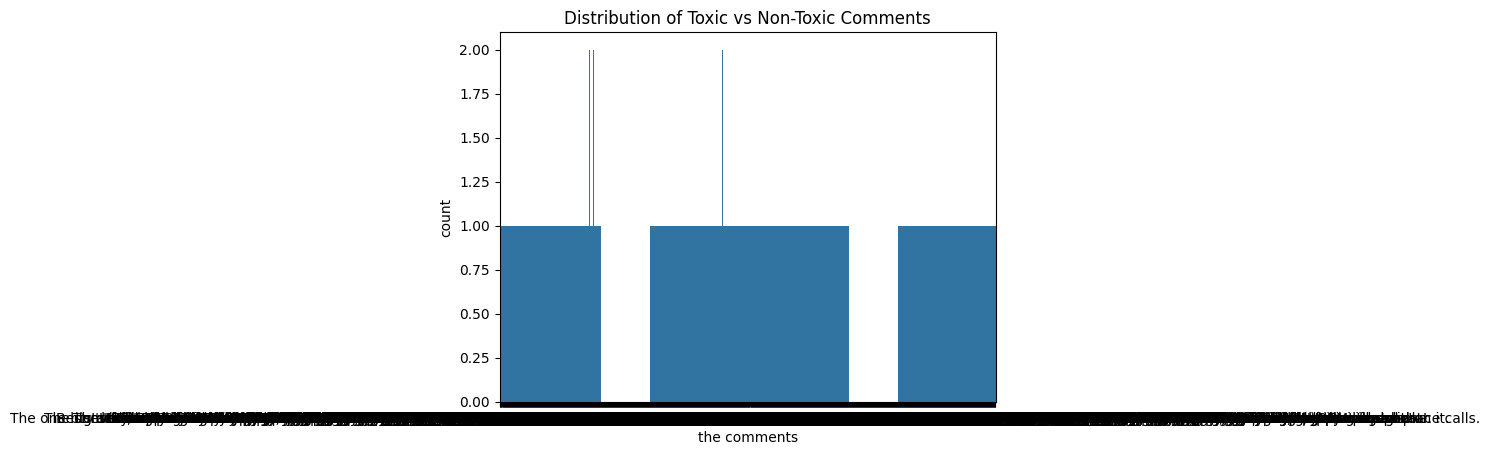

In [74]:
# Distribution of the target variable (if labeled)
sns.countplot(x='the comments', data=df)
plt.title('Distribution of Toxic vs Non-Toxic Comments')
plt.show()


In [75]:
# Example: Check model prediction for a specific comment
comment = "You fool"
transformed_comment = vectorizer.transform([comment])
prediction = model.predict(transformed_comment)
print(f'Comment: "{comment}" - Prediction: {"Toxic" if prediction[0] else "Not Toxic"}')

Comment: "You fool" - Prediction: Toxic


In [76]:
# Display the column names in the DataFrame
print(df.columns)


Index(['the comments', 'y', 'cleaned_comment'], dtype='object')


In [77]:
import nltk
import os

# Set the path to NLTK data if necessary
nltk.data.path.append('D:/nltk_data')  # Adjust this path as needed

# Try to download resources to the specified directory
nltk.download('stopwords', download_dir='D:/nltk_data')
nltk.download('punkt', download_dir='D:/nltk_data')


[nltk_data] Downloading package stopwords to D:/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to D:/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Ensure data is available
try:
    nltk.download('stopwords')
    nltk.download('punkt')
except Exception as e:
    print(f"Error downloading NLTK data: {e}")

# Function to preprocess text
def preprocess_text(text):
    if not isinstance(text, str):  # Handle non-string cases
        return ""
    try:
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)
        # Tokenize
        tokens = word_tokenize(text)
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
        return ' '.join(tokens)
    except Exception as e:
        print(f"Error processing text: {e}")
        return text

# Load your DataFrame
df = pd.read_csv('D:/BSC SE/Dessettation Project/toxic/tryy/amazon.csv')

# Clean the 'the comments' column
df['the comments'] = df['the comments'].fillna('')  # Replace NaN with empty string

# Apply preprocessing to the comments
df['cleaned_comment'] = df['the comments'].apply(preprocess_text)

# Display the cleaned data
print(df[['the comments', 'cleaned_comment']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\THARMI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\THARMI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Error processing text: 
**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/english/

  Searched in:
    - 'C:\\Users\\THARMI/nltk_data'
    - 'd:\\BSC SE\\Dessettation Project\\toxic\\tryy\\env\\nltk_data'
    - 'd:\\BSC SE\\Dessettation Project\\toxic\\tryy\\env\\share\\nltk_data'
    - 'd:\\BSC SE\\Dessettation Project\\toxic\\tryy\\env\\lib\\nltk_data'
    - 'C:\\Users\\THARMI\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'D:/nltk_data'
    - 'D:/nltk_data'
**********************************************************************

Error processing text: 
**********************************************************************
  Resource punkt_tab not found.
  Please use th

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
# Feature and target variables
X = df['cleaned_comment']
y = df['y']


In [23]:
print(df.columns)


Index(['the comments', 'y', 'cleaned_comment'], dtype='object')


In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the number of samples in each set
print(f"Training data: {X_train.shape[0]} samples")
print(f"Testing data: {X_test.shape[0]} samples")


Training data: 800 samples
Testing data: 200 samples


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vectorized = vectorizer.transform(X_test)


In [81]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_vectorized, y_train)


LogisticRegression()

In [82]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test data
y_pred = model.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       107
           1       0.77      0.87      0.82        93

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



**Hyperparameter Tuning**

In [83]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Fit GridSearchCV
grid_search.fit(X_train_vectorized, y_train)

# Best parameters
print("Best parameters found:")
print(grid_search.best_params_)


Best parameters found:
{'C': 10}


**Cross-Validation**

In [84]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_vectorized, y_train, cv=5)
print(f"Cross-validation scores: {scores}")


Cross-validation scores: [0.78125 0.79375 0.81875 0.79375 0.825  ]


**Top toxic feature**

In [86]:
# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the coefficients from the trained model
coefficients = model.coef_.flatten()

# Sort and display the top features
top_toxic_features = np.argsort(coefficients)[-10:]
print(f"Top features for predicting toxic comments: {feature_names[top_toxic_features]}")


Top features for predicting toxic comments: ['disappointing' 'then' 'money' 'waste' 'first' 'bad' 'worst'
 'disappointed' 'poor' 'not']


Top Non-Toxic feature

In [87]:
# Sort the coefficients in ascending order and get the top non-toxic features (largest negative coefficients)
top_non_toxic_features = np.argsort(coefficients)[:10]

print(f"Top features for predicting non-toxic comments: {feature_names[top_non_toxic_features]}")


Top features for predicting non-toxic comments: ['great' 'good' 'works' 'best' 'excellent' 'well' 'love' 'nice' 'and'
 'very']


**Final Visualization**

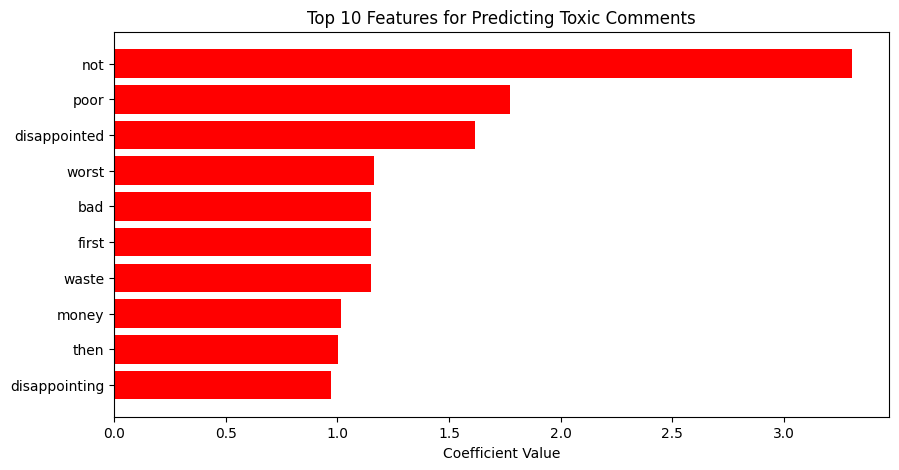

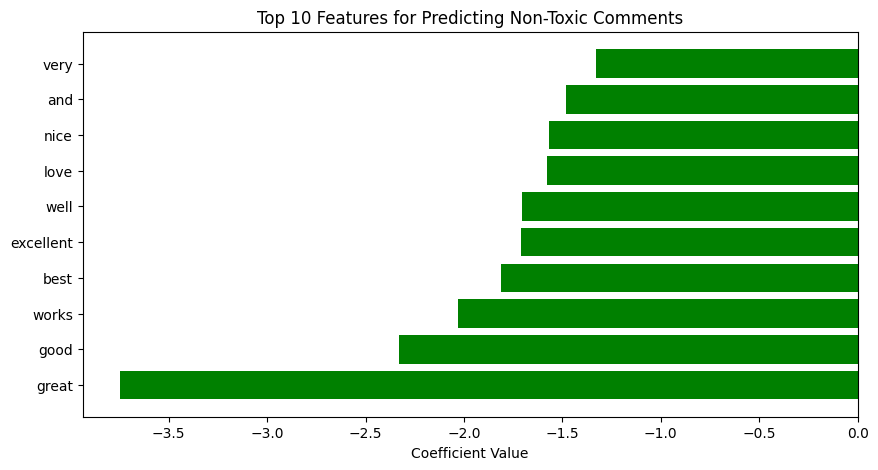

In [88]:
import matplotlib.pyplot as plt

# Get the top 10 toxic and non-toxic words with their coefficients
top_toxic_coefficients = coefficients[top_toxic_features]
top_non_toxic_coefficients = coefficients[top_non_toxic_features]

# Plot toxic features
plt.figure(figsize=(10, 5))
plt.barh(feature_names[top_toxic_features], top_toxic_coefficients, color='red')
plt.title('Top 10 Features for Predicting Toxic Comments')
plt.xlabel('Coefficient Value')
plt.show()

# Plot non-toxic features
plt.figure(figsize=(10, 5))
plt.barh(feature_names[top_non_toxic_features], top_non_toxic_coefficients, color='green')
plt.title('Top 10 Features for Predicting Non-Toxic Comments')
plt.xlabel('Coefficient Value')
plt.show()


Save the Model

In [90]:
import joblib

# Save the model and vectorizer
joblib.dump(model, 'toxic_comment_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

Load the saved model and vectorizer

In [91]:
import joblib

# Load the model and vectorizer
model = joblib.load('toxic_comment_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')


In [89]:
# Example: Check model prediction for a specific comment
comment = "You fool"
transformed_comment = vectorizer.transform([comment])
prediction = model.predict(transformed_comment)
print(f'Comment: "{comment}" - Prediction: {"Toxic" if prediction[0] else "Not Toxic"}')


Comment: "You fool" - Prediction: Toxic


In [60]:
import pandas as pd

# Load the data
file_path = '/BSC SE/Dessettation Project/toxic/tryy/amazon.csv'
data = pd.read_csv(file_path)

# Print first few rows and column names
print(data.head())
print("Columns in the dataset:", data.columns)


                                        the comments  y
0  So there is no way for me to plug it in here i...  0
1                        Good case, Excellent value.  1
2                             Great for the jawbone.  1
3  Tied to charger for conversations lasting more...  0
4                                  The mic is great.  1
Columns in the dataset: Index(['the comments', 'y'], dtype='object')


In [93]:
def preprocess_text(text):
    return text.lower()  # Apply any other preprocessing steps if needed

# Apply preprocessing
data['the comments'] = data['the comments'].apply(preprocess_text)
X_test = vectorizer.transform(data['the comments'])


In [94]:
# Predict using the model
predictions = model.predict(X_test)

# Print predictions
for comment, prediction in zip(data['the comments'], predictions):
    print(f'Comment: "{comment}" - Prediction: {"Toxic" if prediction else "Not Toxic"}')


Comment: "so there is no way for me to plug it in here in the us unless i go by a converter." - Prediction: Toxic
Comment: "good case, excellent value." - Prediction: Not Toxic
Comment: "great for the jawbone." - Prediction: Not Toxic
Comment: "tied to charger for conversations lasting more than 45 minutes.major problems!!" - Prediction: Toxic
Comment: "the mic is great." - Prediction: Not Toxic
Comment: "i have to jiggle the plug to get it to line up right to get decent volume." - Prediction: Toxic
Comment: "if you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one." - Prediction: Toxic
Comment: "if you are razr owner...you must have this!" - Prediction: Toxic
Comment: "needless to say, i wasted my money." - Prediction: Toxic
Comment: "what a waste of money and time!." - Prediction: Toxic
Comment: "and the sound quality is great." - Prediction: Not Toxic
Comment: "he was very impressed when going from the original battery to the ext